<a href="https://colab.research.google.com/github/egagli/amath563/blob/main/labs/7/Lab7_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: Applications and Extensions of RNNs 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

## Preprocess Data

#### Included with this lab are TSLA.csv, GOOGL.csv and DJI.csv files. Use Pandas to retrieve the dataset. 
#### Use only Open price as your input. (You will train three models for three different stocks, don't mix these data together!)

In [84]:
dji_df = pd.read_csv('DJI.csv')
google_df = pd.read_csv('GOOGL.csv')
tesla_df = pd.read_csv('TSLA.csv')

## Plot Stocks

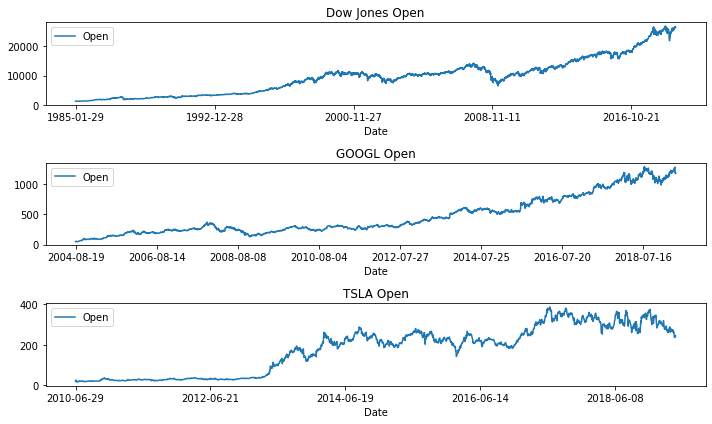

In [54]:
f,ax=plt.subplots(3,1,figsize=(10,6),sharex=False)
dji_df.plot(x='Date',y='Open', ax=ax[0])
ax[0].set_title('Dow Jones Open')
google_df.plot(x='Date',y='Open', ax=ax[1])
ax[1].set_title('GOOGL Open')
tesla_df.plot(x='Date',y='Open', ax=ax[2])
ax[2].set_title('TSLA Open')
plt.tight_layout()

## Choose stock to predict

In [55]:
stock = dji_df

## Normalize and split data

In [72]:
def normalize_and_split(stock, input_window,train_split):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    stock_open = stock[['Open']]
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    normalized = scaler.fit_transform(stock_open.values.reshape(-1,1))

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - input_window): 
        data.append(normalized[index: index + input_window])
    
    data = np.array(data);
    test_set_size = int(np.round((1-train_split)*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    Xtrain = data[:train_set_size,:-1,:]
    Ytrain = data[:train_set_size,-1,:]
    
    Xtest = data[train_set_size:,:-1]
    Ytest = data[train_set_size:,-1,:]

    return [np2tnsr(Xtrain), np2tnsr(Ytrain), np2tnsr(Xtest), np2tnsr(Ytest)]

def np2tnsr(array):
    return torch.from_numpy(array).type(torch.Tensor)

In [73]:
Xtrain, Ytrain, Xtest, Ytest = normalize_and_split(stock, train_split=0.8, input_window = 10)

## Define RNN (Here I used GRU)

In [76]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

## Set Hyperparameters

In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [77]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train Model

In [83]:
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for i in range(num_epochs):
    Ytrain_guess = model(Xtrain)
    loss = criterion(Ytrain_guess, Ytrain)
    print(f'Epoch: {i+1} MSE: {loss.item():0.6f}')
    hist[t] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1 MSE: 0.00010
Epoch: 2 MSE: 0.00010
Epoch: 3 MSE: 0.00010
Epoch: 4 MSE: 0.00010
Epoch: 5 MSE: 0.00010
Epoch: 6 MSE: 0.00010
Epoch: 7 MSE: 0.00010
Epoch: 8 MSE: 0.00010
Epoch: 9 MSE: 0.00010
Epoch: 10 MSE: 0.00010
Epoch: 11 MSE: 0.00010
Epoch: 12 MSE: 0.00010
Epoch: 13 MSE: 0.00010
Epoch: 14 MSE: 0.00010
Epoch: 15 MSE: 0.00010
Epoch: 16 MSE: 0.00010
Epoch: 17 MSE: 0.00010
Epoch: 18 MSE: 0.00010
Epoch: 19 MSE: 0.00010
Epoch: 20 MSE: 0.00010
Epoch: 21 MSE: 0.00010
Epoch: 22 MSE: 0.00010
Epoch: 23 MSE: 0.00010
Epoch: 24 MSE: 0.00010
Epoch: 25 MSE: 0.00010
Epoch: 26 MSE: 0.00010
Epoch: 27 MSE: 0.00010
Epoch: 28 MSE: 0.00010
Epoch: 29 MSE: 0.00010
Epoch: 30 MSE: 0.00010
Epoch: 31 MSE: 0.00010
Epoch: 32 MSE: 0.00010
Epoch: 33 MSE: 0.00010
Epoch: 34 MSE: 0.00010
Epoch: 35 MSE: 0.00010
Epoch: 36 MSE: 0.00010
Epoch: 37 MSE: 0.00010
Epoch: 38 MSE: 0.00010
Epoch: 39 MSE: 0.00010
Epoch: 40 MSE: 0.00010
Epoch: 41 MSE: 0.00010
Epoch: 42 MSE: 0.00010
Epoch: 43 MSE: 0.00010
Epoch: 44 MSE: 0.000

## Normalize your data.

In [10]:
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized = scaler.fit_transform(stock['Open'].values.reshape(-1,1))

## Split training, validation and testing data

In [11]:
def train_test_split(t, y, split = 0.8): # code from seq2seq example notebook

  '''
  
  split time series into train/test sets
  
  : param t:                      time array
  : para y:                       feature array
  : para split:                   percent of data to include in training set 
  : return t_train, y_train:      time/feature training and test sets;  
  :        t_test, y_test:        (shape: [# samples, 1])
  
  '''
  
  indx_split = int(split * len(y))
  indx_train = np.arange(0, indx_split)
  indx_test = np.arange(indx_split, len(y))
  print(indx_test)

  t_train = t[indx_train]
  y_train = y[indx_train]
  y_train = y_train.reshape(-1, 1)
  
  t_test = t[indx_test]
  y_test = y[indx_test]
  y_test = y_test.reshape(-1, 1)
  
  return t_train, y_train, t_test, y_test 

def windowed_dataset(y, input_window = 5, output_window = 1, stride = 1, num_features = 1):
  
    '''
    create a windowed dataset
    
    : param y:                time series feature (array)
    : param input_window:     number of y samples to give model 
    : param output_window:    number of future y samples to predict  
    : param stide:            spacing between windows   
    : param num_features:     number of features (i.e., 1 for us, but we could have multiple features)
    : return X, Y:            arrays with correct dimensions for LSTM
    :                         (i.e., [input/output window size # examples, # features])
    '''
  
    L = y.shape[0]
    num_samples = (L - input_window - output_window) // stride + 1

    X = np.zeros([input_window, num_samples, num_features])
    Y = np.zeros([output_window, num_samples, num_features])    
    
    for ff in np.arange(num_features):
        for ii in np.arange(num_samples):
            start_x = stride * ii
            end_x = start_x + input_window
            X[:, ii, ff] = y[start_x:end_x, ff]

            start_y = stride * ii + input_window
            end_y = start_y + output_window 
            Y[:, ii, ff] = y[start_y:end_y, ff]

    return X, Y


def numpy_to_torch(Xtrain, Ytrain, Xtest, Ytest):
  '''
  convert numpy array to PyTorch tensor
    
  : param Xtrain:                           windowed training input data (input window size, # examples, # features); np.array
  : param Ytrain:                           windowed training target data (output window size, # examples, # features); np.array
  : param Xtest:                            windowed test input data (input window size, # examples, # features); np.array
  : param Ytest:                            windowed test target data (output window size, # examples, # features); np.array
  : return X_train_torch, Y_train_torch,
  :        X_test_torch, Y_test_torch:      all input np.arrays converted to PyTorch tensors 
  '''
    
  X_train_torch = torch.from_numpy(Xtrain).type(torch.Tensor)
  Y_train_torch = torch.from_numpy(Ytrain).type(torch.Tensor)

  X_test_torch = torch.from_numpy(Xtest).type(torch.Tensor)
  Y_test_torch = torch.from_numpy(Ytest).type(torch.Tensor)
    
  return X_train_torch, Y_train_torch, X_test_torch, Y_test_torch

In [12]:
Ttrain, Ytrain, Ttest, Ytest = train_test_split(np.array(stock.index),normalized, split = 0.8)
Xtrain,Ytrain = windowed_dataset(Ytrain)
print(Ytrain)
Xtrain, Ytrain, Xtest, Ytest = numpy_to_torch(Xtrain, Ytrain, Xtest, Ytest)
#print(Xtrain.numpy())

[6908 6909 6910 ... 8633 8634 8635]
[[[-0.99606482]
  [-0.99678152]
  [-0.99677292]
  ...
  [-0.10835431]
  [-0.09938122]
  [-0.10113187]]]


## RNN Model

In [40]:
class GRUModel(nn.Module): # code from lab 7 slides
  def __init__(self,input_dim,hidden_dim,num_layers,output_dim):
    super(GRUModel,self).__init__() 
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers
    self.gru = nn.GRU(input_dim, hidden_dim, num_layers,batch_first=True)
    self.fc = nn.Linear(hidden_dim,output_dim)

  def forward(self,x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    print(x.size())
    print(h0.size())
    out, (hn,cn) = self.gru(x,h0)
    out = self.fc(out[:,-1,:])
    return out

# Set Hyperparameters

In [41]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 10

In [42]:
model = GRUModel(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers, output_dim=output_dim)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

## Training code

In [43]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()

for t in range(num_epochs):
    Ytrain_guess = model(Xtrain)
    print(Ytrain_guess)
    print(Ytrain)
    loss = criterion(Ytrain_guess, Ytrain)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

torch.Size([5, 6903, 1])
torch.Size([2, 5, 32])
tensor([[0.1321],
        [0.1322],
        [0.1322],
        [0.1323],
        [0.1324]], grad_fn=<AddmmBackward0>)
tensor([[[-0.9961],
         [-0.9968],
         [-0.9968],
         ...,
         [-0.1084],
         [-0.0994],
         [-0.1011]]])


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1, 6903, 1])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

In [ ]:
hist

## Testing code